**JAYESH SURYAWANSHI**  
  
**The Sparks Foundation**  
  
**Data Science and Business Analytics**  
**Task 1**


# **Exploratory Data Analysis - Retail**  

The following is an Exploratory Data Analysis performed on the dataset 'SampleSuperstore'

# STEP 1: Importing and Reading the Data

In [35]:
#Start by importing all the required libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Read the dataset

df = pd.read_csv('SampleSuperstore.csv')

# Step 2: Understanding the data

In [37]:
df.shape        #Helps to identify the number of rows and columns

(9994, 13)

In [38]:
df.head()       #This step returns the first 5 rows of the dataframe

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [39]:
df.tail()       #This step returns the last 5 rows of the dataframe

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [40]:
df.columns      #Specifies names of all columns present

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [41]:
df.dtypes       #Specifies the data types of each column

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [42]:
df.info()       #The above two steps can be performed together using this single statement

#Provides a bried information including number of non null values, data types of each column, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


From the above steps, we find out that there are a total of 13 columns and 9994 rows in the dataframe.  

There are no null values present in the dataset either  

It can also be seen that the data types of each column matches the data properly.

In [43]:
df[['Sales','Quantity','Discount','Profit']].describe()     

#This step helps us find important statistics such as min, max, mean, standard deviation for all/ specified columns

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


It is found that the **highest sales value** is of **22638.48**
while the **highest number of products** sold at the same time are **14**.  

The **maximum discount** provided for a product is 80% whilst the maximum profit is **8399.976**.  


The **average profit** is of **28.656896** while the **lowest profit** is **-6599.978** which is negative and in turn specifies that the sale resulted in a loss.

# Step 3: Data Preparation, Cleaning, Manipulation

In [50]:
df['Country'].unique()

array(['United States'], dtype=object)

As all purchases are from the same country, the **Country** column can be dropped from the dataframe.

In [51]:
df.drop('Country',axis='columns',inplace=True)

The data consists of no null values, the data types specified for columns are as required and all the remaining columns are important.

Thus no null values need to be handled or treated in this scenario. Also, no columns need to be dropped.  

However, we can create 2 new columns that can be used in the later stages namely **Cost_price_per_product** and **Actual_sales_price**.

In [44]:
df['Actual_sales_price'] = (df['Sales']*(1+df['Discount']) - df['Profit']).round(4)
df['Cost_price_per_product'] = ((df['Sales']*(1+df['Discount']) - df['Profit'])/df['Quantity']).round(4)

We make an assumption based on the data given that the column named 'Sales' specified the discounted Sales price. Hence, we rename the column to **Discounted_sales_price** and keep the other column names unchanged as they properly denote the data specified

In [45]:
df.rename(columns={'Sales':'Discounted_sales_price'},inplace=True)

In [52]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Discounted_sales_price,Quantity,Discount,Profit,Actual_sales_price,Cost_price_per_product
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,110.0232
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,170.7860
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,3.8743
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1771.5184,354.3037
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,24.3252,12.1626


In [47]:
df.duplicated().sum()

17

It is found out that there are 17 duplicate values.  

We drop these duplicates from the dataset.

In [48]:
df = df[~df.duplicated()].reset_index(drop=True).copy()


In [49]:
df.shape    #New dataframe shape post dropping the duplicates

(9977, 15)

# Step 4: Understanding the features (Univariate analysis)

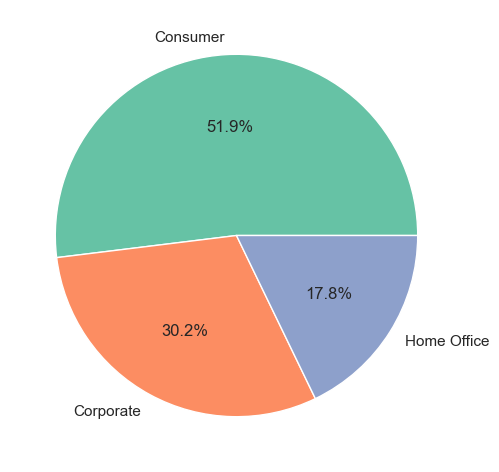

In [131]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax.pie(data=df,x=df['Segment'].value_counts(),labels=df['Segment'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('Set2'));

There are 3 Segments and the highest number of purchases were made for the **Consumer** segment

In [108]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<Figure size 600x400 with 0 Axes>

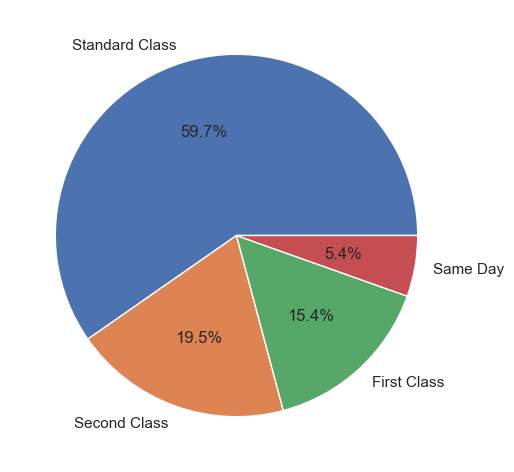

In [116]:
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax.pie(data=df,x=df['Ship Mode'].value_counts(),labels=df['Ship Mode'].value_counts().index,autopct='%1.1f%%');

There are 4 different modes of shipping and the **Standard Class** is most often chosen

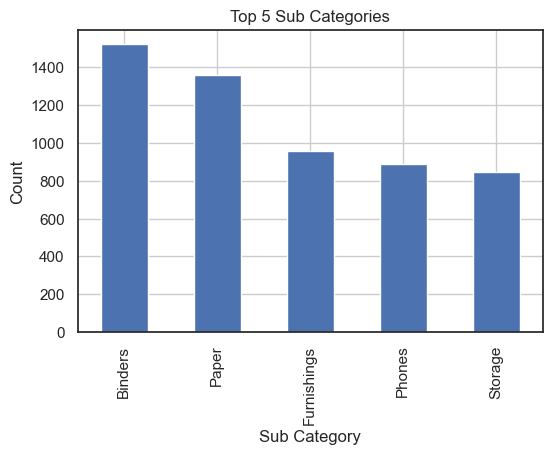

In [132]:
plt.figure(dpi=100)
ax = df['Sub-Category'].value_counts().head().plot(kind='bar',title='Top 5 Sub Categories')
ax.set_xlabel('Sub Category')
ax.set_ylabel('Count')
ax.grid()

<AxesSubplot:xlabel='Region', ylabel='count'>

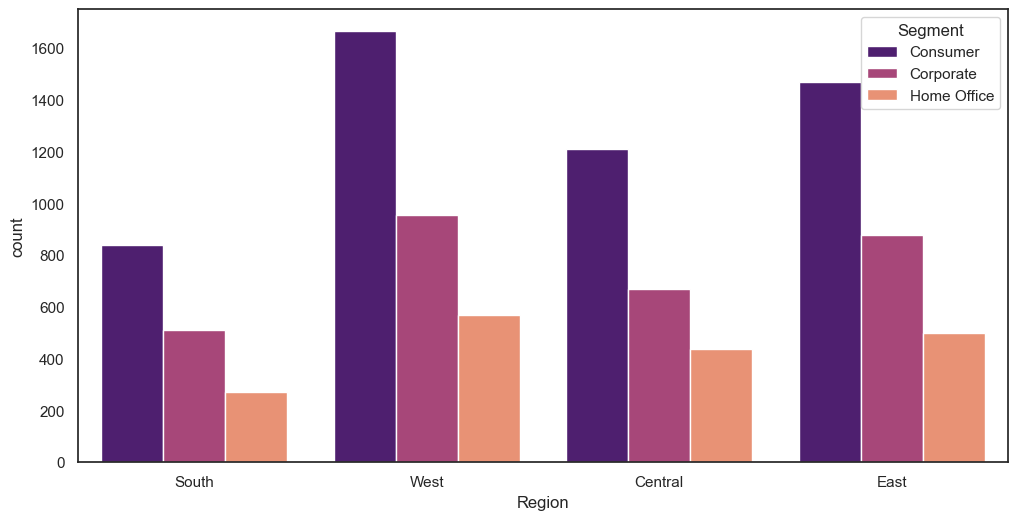

In [68]:
plt.figure(figsize=(12,6),dpi=100)
# plt.style.use('seaborn')
sns.countplot(data=df,x='Region',hue='Segment',palette='magma') #most consumer, corporate and home office orders from west

The majority of purchases were from **West Region**

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

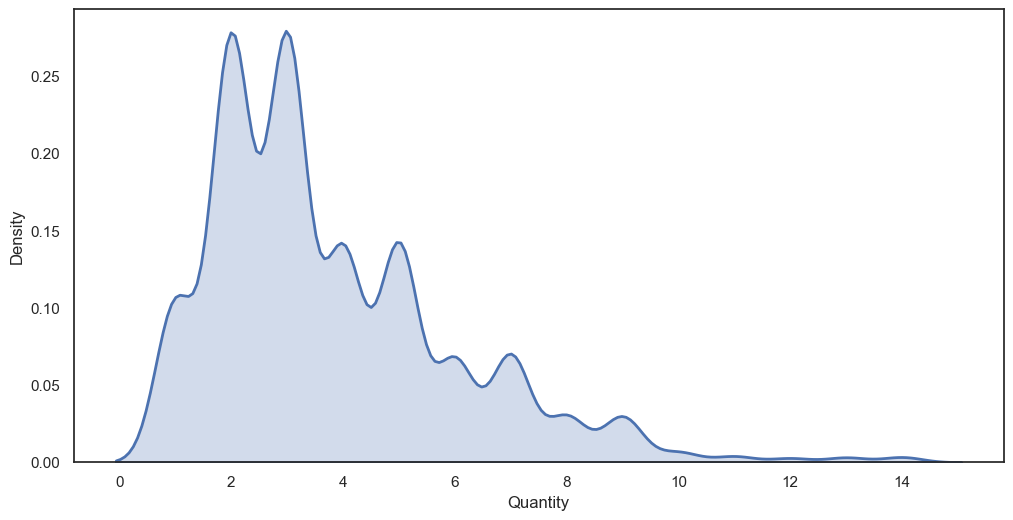

In [162]:
fig,ax= plt.subplots(figsize=(12,6),dpi=100)
sns.kdeplot(data=df,x='Quantity', fill=True,ax=ax,label='Profit',lw=2)


This KDE plot depicts the probability density at different values in **Quantity**

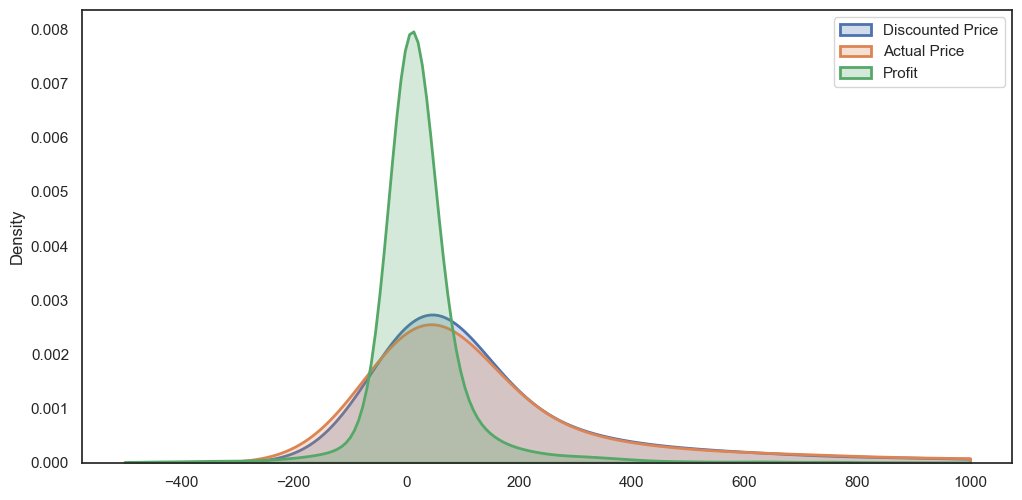

In [161]:
fig,ax= plt.subplots(figsize=(12,6),dpi=100)
# sns.kdeplot(data=df,x='Quantity', fill=True)
sns.kdeplot(data=df,x='Discounted_sales_price', fill=True,clip=(-500,1000),ax=ax,label='Discounted Price',lw=2)
sns.kdeplot(data=df,x='Actual_sales_price', fill=True,clip=(-500,1000),ax=ax,label='Actual Price',lw=2)
sns.kdeplot(data=df,x='Profit', fill=True,clip=(-500,1000),ax=ax,label='Profit',lw=2)
ax.set(xlabel='')
ax.legend()

This KDE plot depicts the probability density at different values in **Discounted Price, Actual Price and Profit**

**Step 5: Feature Relationships**

[Text(0.5, 1.0, 'Sales vs Profit')]

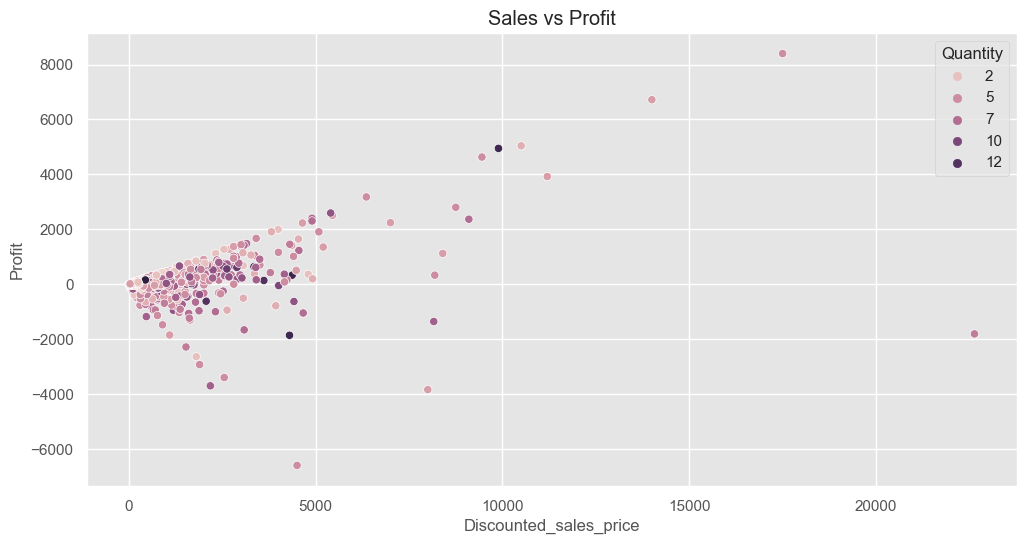

In [192]:
plt.figure(figsize=(12,6),dpi=100)
plt.style.use('ggplot')
sns.scatterplot(data=df,x='Discounted_sales_price',y='Profit',hue='Quantity').set(title='Sales vs Profit')



We find that there exists no such concrete relationship between **Sales** and **Profit**

[Text(0.5, 1.0, 'Sales vs Profit')]

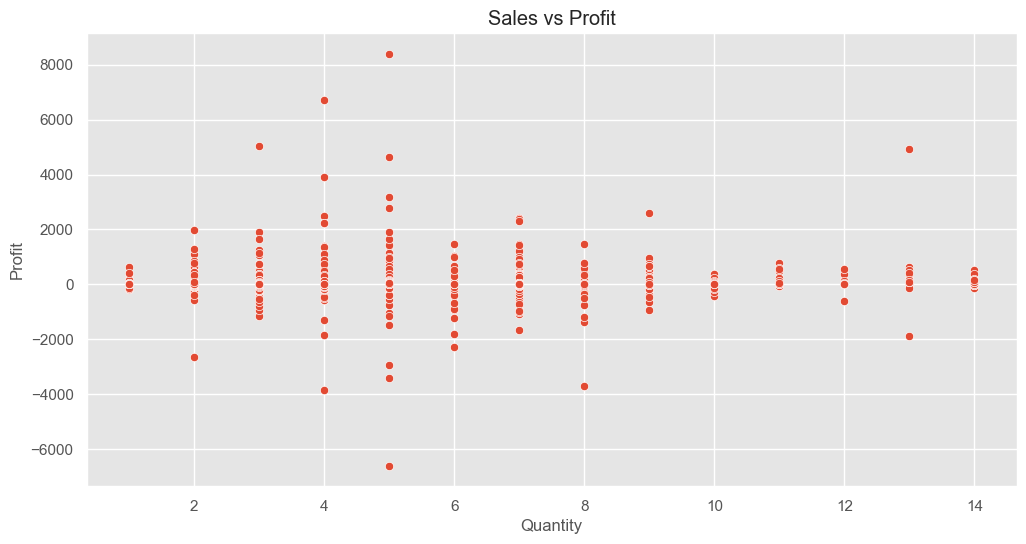

In [195]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(data=df,x='Quantity',y='Profit').set(title='Quantity vs Profit')

Similarly, there exists no such concrete relationship between **Quantity** and **Profit**

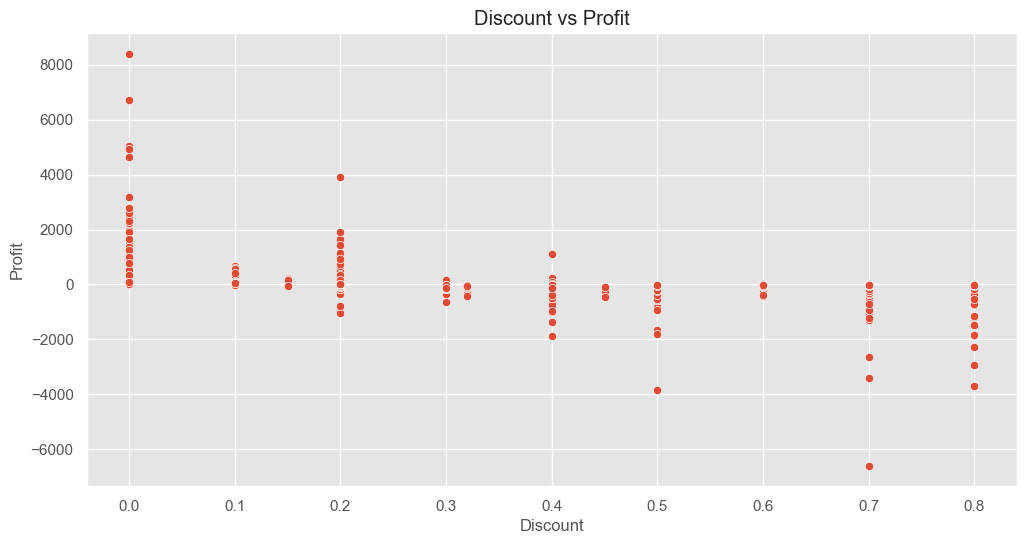

In [205]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(data=df,x='Discount',y='Profit').set(title='Discount vs Profit');

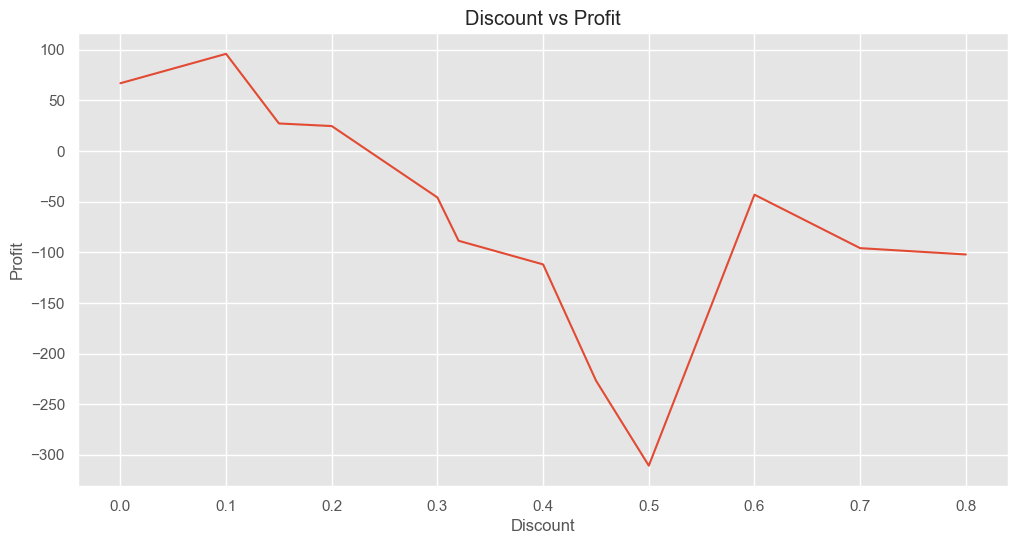

In [203]:
plt.figure(figsize=(12,6),dpi=100)
sns.lineplot(data=df,x='Discount',y='Profit',errorbar=None).set(title='Discount vs Profit');

The **Profit** is primarily affected by the amount of **Discount** provided
as profit decreases as the discount increases. A discount of 0.3 and above leads to a loss in most cases.

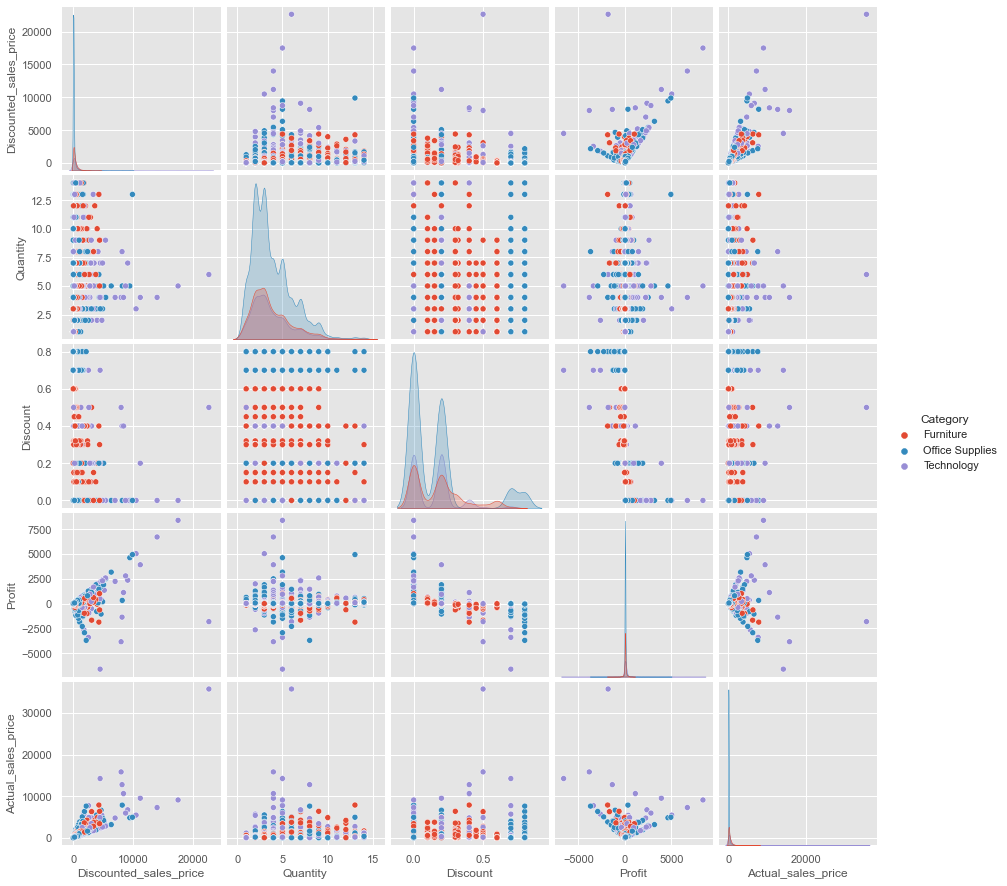

In [225]:
sns.pairplot(data=df,vars=['Discounted_sales_price','Quantity','Discount','Profit','Actual_sales_price'],hue='Category')

In [223]:
df[['Discounted_sales_price','Quantity','Discount','Profit','Actual_sales_price','Cost_price_per_product']].corr()

,Discounted_sales_price,Quantity,Discount,Profit,Actual_sales_price,Cost_price_per_product
Discounted_sales_price,1.000000,0.200722,-0.028311,0.479067,0.886675,0.806156
Quantity,0.200722,1.000000,0.008678,0.066211,0.183233,-0.000718
Discount,-0.028311,0.008678,1.000000,-0.219662,0.091102,0.103661
Profit,0.479067,0.066211,-0.219662,1.000000,0.031621,0.050468
Actual_sales_price,0.886675,0.183233,0.091102,0.031621,1.000000,0.895972
Cost_price_per_product,0.806156,-0.000718,0.103661,0.050468,0.895972,1.000000


<AxesSubplot:>

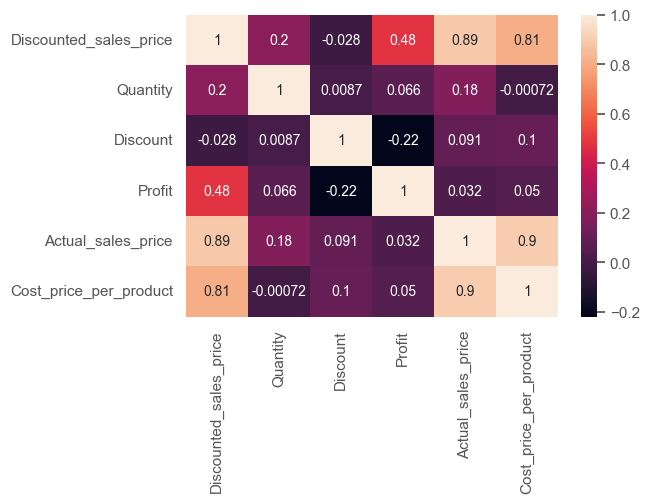

In [222]:
plt.figure(dpi=100)
sns.heatmap(df[['Discounted_sales_price','Quantity','Discount','Profit','Actual_sales_price','Cost_price_per_product']].corr(),annot=True)

The heatmap helps us identify the correlation between multiple dimensions

It shows a moderate positive correlation between **Discounted_sales_price** and **Profit** while a weak negative correlation between **Discount** and **Profit**

In [241]:
df.groupby('Category')['Profit'].agg(['min','max','mean','sum','count'])
# df.groupby('Segment')['Profit'].agg(['min','max','mean','sum','count'])

,min,max,mean,sum,count
Category,,,,,
Furniture,-1862.3124,1013.127,8.697740,18421.8137,2118
Office Supplies,-3701.8928,4946.370,20.353403,122364.6608,6012
Technology,-6599.9780,8399.976,78.752002,145454.9481,1847


The **Technology** Category has lowest number of purchases, yet has yielded the highest **Profit** whilst the **Furniture** Category has yielded the lowest **Profit**.

However the maximum loss recorded was also for an order from the **Technology** Category.

In [282]:
for i in df.groupby('Category')['Profit'].min():
    a = str(df[df['Profit']==i]['Discount']).split(' ')
    a.remove(a[0])
    ele = ''
    x=[i for i in a if i!=ele]
    print('Profit: ',i, '\tDiscount: ', float(x[0][0:-6]))




Profit:  -1862.3124 	Discount:  0.4
Profit:  -3701.8928 	Discount:  0.8
Profit:  -6599.978 	Discount:  0.7


In [283]:
for i in df.groupby('Category')['Profit'].max():
    a = str(df[df['Profit']==i]['Discount']).split(' ')
    a.remove(a[0])
    ele = ''
    x=[i for i in a if i!=ele]
    print('Profit: ',i, '\tDiscount: ', float(x[0][0:-6]))



Profit:  1013.127 	Discount:  0.0
Profit:  4946.37 	Discount:  0.0
Profit:  8399.976 	Discount:  0.0


This indicates that in each category, the highest loss is when the discount is very high and the highest profit is when the discount is very low. This again confirms the previous findings of profit reducing with increase in discount.

In [318]:
df.groupby(['Category','Sub-Category'])['Profit'].agg(['count','sum'])

count         sum
Category        Sub-Category                   
Furniture       Bookcases       228  -3472.5560
                Chairs          615  26567.1278
                Furnishings     956  13052.7230
                Tables          319 -17725.4811
Office Supplies Appliances      466  18138.0054
                Art             795   6524.6118
                Binders        1522  30228.0003
                Envelopes       254   6964.1767
                Fasteners       217    949.5182
                Labels          363   5526.3820
                Paper          1359  33944.2395
                Storage         846  21278.8264
                Supplies        190  -1189.0995
Technology      Accessories     775  41936.6357
                Copiers          68  55617.8249
                Machines        115   3384.7569
                Phones          889  44515.7306


From the above findings, one way to make more profit is to try and increase sales from the **Technology** category, particularly for **Copiers** and with discounts of 20% or below.  

It can also been seen Tables from the furniture category account to a large portion of loss so reducing their sales or selling them with very low to no discounts is another way to make profit.